# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ------------------------- ------------ 460.8/675.6 kB 9.6 MB/s eta 0:00:01
     ------------------------------------- 675.6/675.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=2c57fc05610e35a7818fbc2e970e8062f25f5b586fe362693e43e0a4e487d777
  Stored in directory: c:\users\matth\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = 'metric'
    city_url = url + cities[i] + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print("proccessing " + cities[i])
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city = city_weather["name"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greymouth
proccessing greymouth
Processing Record 2 of Set 1 | nova sintra
proccessing nova sintra
Processing Record 3 of Set 1 | port-aux-francais
proccessing port-aux-francais
Processing Record 4 of Set 1 | birjand
proccessing birjand
Processing Record 5 of Set 1 | kolonia
proccessing kolonia
Processing Record 6 of Set 1 | ranchi
proccessing ranchi
Processing Record 7 of Set 1 | edinburgh of the seven seas
proccessing edinburgh of the seven seas
Processing Record 8 of Set 1 | blackmans bay
proccessing blackmans bay
Processing Record 9 of Set 1 | granville
proccessing granville
Processing Record 10 of Set 1 | tiksi
proccessing tiksi
Processing Record 11 of Set 1 | papatowai
proccessing papatowai
Processing Record 12 of Set 1 | puerto aysen
proccessing puerto aysen
Processing Record 13 of Set 1 | bilibino
proccessing bilibino
Processing Record 14 of Set 1 | nar'yan-mar
proccessing nar'yan-mar
Pro

proccessing takamaka
City not found. Skipping...
Processing Record 26 of Set 3 | la tuque
proccessing la tuque
Processing Record 27 of Set 3 | cockburn town
proccessing cockburn town
Processing Record 28 of Set 3 | newburyport
proccessing newburyport
Processing Record 29 of Set 3 | yellowknife
proccessing yellowknife
Processing Record 30 of Set 3 | sos'va
proccessing sos'va
Processing Record 31 of Set 3 | hefei
proccessing hefei
Processing Record 32 of Set 3 | atafu village
proccessing atafu village
Processing Record 33 of Set 3 | laela
proccessing laela
Processing Record 34 of Set 3 | olonkinbyen
proccessing olonkinbyen
Processing Record 35 of Set 3 | salekhard
proccessing salekhard
Processing Record 36 of Set 3 | sima
proccessing sima
Processing Record 37 of Set 3 | vadso
proccessing vadso
Processing Record 38 of Set 3 | ulsan
proccessing ulsan
Processing Record 39 of Set 3 | kingston
proccessing kingston
Processing Record 40 of Set 3 | al mawsil al jadidah
proccessing al mawsil al j

proccessing bandarbeyla
Processing Record 2 of Set 6 | fortaleza
proccessing fortaleza
Processing Record 3 of Set 6 | keflavik
proccessing keflavik
Processing Record 4 of Set 6 | fuvahmulah
proccessing fuvahmulah
City not found. Skipping...
Processing Record 5 of Set 6 | hawaiian paradise park
proccessing hawaiian paradise park
Processing Record 6 of Set 6 | yanbu
proccessing yanbu
Processing Record 7 of Set 6 | flying fish cove
proccessing flying fish cove
Processing Record 8 of Set 6 | puerto baquerizo moreno
proccessing puerto baquerizo moreno
Processing Record 9 of Set 6 | kavaratti
proccessing kavaratti
Processing Record 10 of Set 6 | nantucket
proccessing nantucket
Processing Record 11 of Set 6 | xilin hot
proccessing xilin hot
Processing Record 12 of Set 6 | king city
proccessing king city
Processing Record 13 of Set 6 | suva
proccessing suva
Processing Record 14 of Set 6 | cadale
proccessing cadale
Processing Record 15 of Set 6 | san jose village
proccessing san jose village
Ci

proccessing duki
Processing Record 27 of Set 8 | mosfellsbaer
proccessing mosfellsbaer
Processing Record 28 of Set 8 | bubaque
proccessing bubaque
Processing Record 29 of Set 8 | guercif
proccessing guercif
Processing Record 30 of Set 8 | la passe
proccessing la passe
Processing Record 31 of Set 8 | isangel
proccessing isangel
Processing Record 32 of Set 8 | vila velha
proccessing vila velha
Processing Record 33 of Set 8 | gazojak
proccessing gazojak
Processing Record 34 of Set 8 | letlhakeng
proccessing letlhakeng
Processing Record 35 of Set 8 | olinda
proccessing olinda
Processing Record 36 of Set 8 | cabinda
proccessing cabinda
Processing Record 37 of Set 8 | ciudad lazaro cardenas
proccessing ciudad lazaro cardenas
Processing Record 38 of Set 8 | sao paulo de olivenca
proccessing sao paulo de olivenca
Processing Record 39 of Set 8 | imperatriz
proccessing imperatriz
Processing Record 40 of Set 8 | maine soroa
proccessing maine soroa
Processing Record 41 of Set 8 | uruacu
proccessin

proccessing ljungby
Processing Record 8 of Set 11 | swakopmund
proccessing swakopmund
Processing Record 9 of Set 11 | bria
proccessing bria
Processing Record 10 of Set 11 | al hasakah
proccessing al hasakah
Processing Record 11 of Set 11 | smithers
proccessing smithers
Processing Record 12 of Set 11 | el bauga
proccessing el bauga
Processing Record 13 of Set 11 | neiafu
proccessing neiafu
Processing Record 14 of Set 11 | pitimbu
proccessing pitimbu
Processing Record 15 of Set 11 | thunder bay
proccessing thunder bay
Processing Record 16 of Set 11 | nuku'alofa
proccessing nuku'alofa
Processing Record 17 of Set 11 | kiunga
proccessing kiunga
Processing Record 18 of Set 11 | xique xique
proccessing xique xique
Processing Record 19 of Set 11 | yagry
proccessing yagry
City not found. Skipping...
Processing Record 20 of Set 11 | palikir - national government center
proccessing palikir - national government center
Processing Record 21 of Set 11 | mossel bay
proccessing mossel bay
Processing R

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Greymouth,-42.4667,171.2000,10.82,88,100,2.92,NZ,1697491952
1,Nova Sintra,14.8667,-24.7167,25.57,73,37,3.71,CV,1697491953
2,Port-aux-Français,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
3,Birjand,32.8663,59.2211,12.26,26,0,5.14,IR,1697491953
4,Cologne,50.9333,6.9500,8.81,88,0,2.06,DE,1697491310


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Greymouth,-42.4667,171.2000,10.82,88,100,2.92,NZ,1697491952
1,Nova Sintra,14.8667,-24.7167,25.57,73,37,3.71,CV,1697491953
2,Port-aux-Français,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
3,Birjand,32.8663,59.2211,12.26,26,0,5.14,IR,1697491953
4,Cologne,50.9333,6.9500,8.81,88,0,2.06,DE,1697491310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

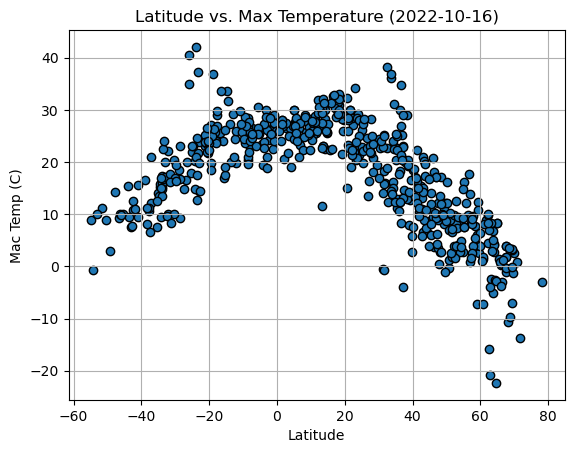

In [29]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat,max_temp,marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Mac Temp (C)")
plt.title("Latitude vs. Max Temperature (2022-10-16)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

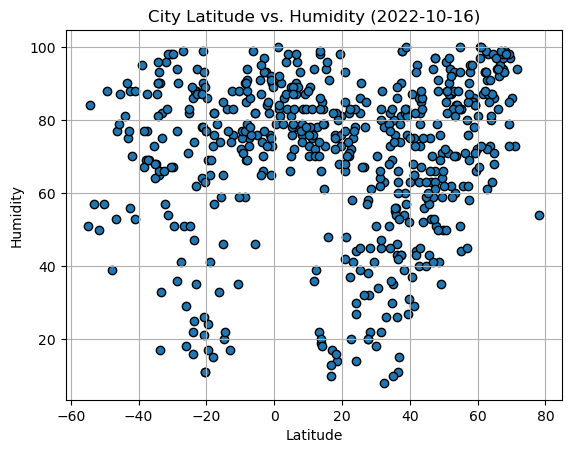

In [30]:
# Build the scatter plots for latitude vs. humidity
hum = city_data_df["Humidity"]
plt.scatter(lat,hum,marker = "o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-16)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

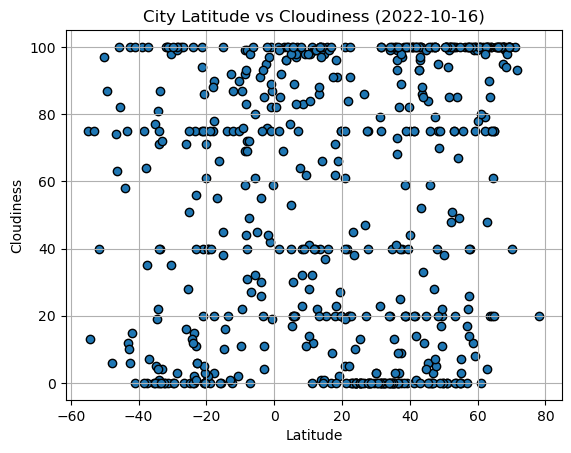

In [32]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df["Cloudiness"]
plt.scatter(lat,cloud,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2022-10-16)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

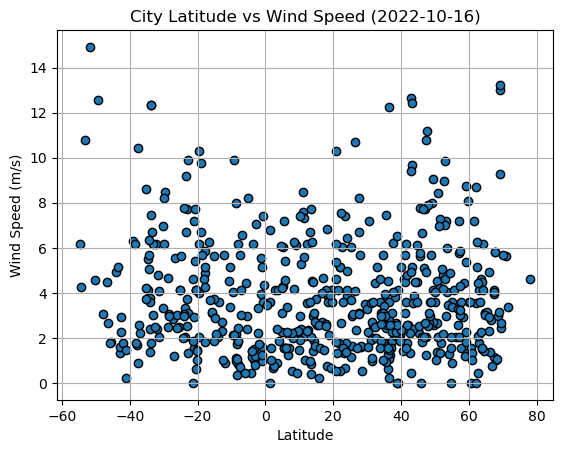

In [33]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(lat,wind,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-16)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def lineregplot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(), y.min()),fontsize=15,color="red")
    print("the r-value is : " + str(rvalue))

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Nova Sintra,14.8667,-24.7167,25.57,73,37,3.71,CV,1697491953
3,Birjand,32.8663,59.2211,12.26,26,0,5.14,IR,1697491953
4,Cologne,50.9333,6.9500,8.81,88,0,2.06,DE,1697491310
5,Ranchi,23.3500,85.3333,20.43,75,0,1.32,IN,1697491953
9,Tiksi,71.6872,128.8694,-13.70,94,93,3.36,RU,1697491954


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Greymouth,-42.4667,171.2000,10.82,88,100,2.92,NZ,1697491952
2,Port-aux-Français,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
6,Edinburgh of the Seven Seas,-37.0676,-12.3116,12.21,69,7,2.21,SH,1697491953
7,Blackmans Bay,-43.0167,147.3167,7.63,75,12,1.34,AU,1697491954
8,Granville,-33.8333,151.0167,15.21,66,40,12.35,AU,1697491954


###  Temperature vs. Latitude Linear Regression Plot

the r-value is : -0.8372699092786285


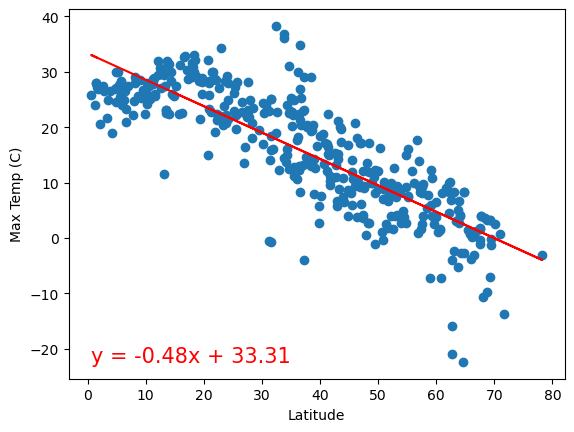

In [107]:
# Linear regression on Northern Hemisphere
NLat = northern_hemi_df["Lat"]
NTemp = northern_hemi_df["Max Temp"]
lineregplot(NLat,NTemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

the r-value is : 0.7242059850730452


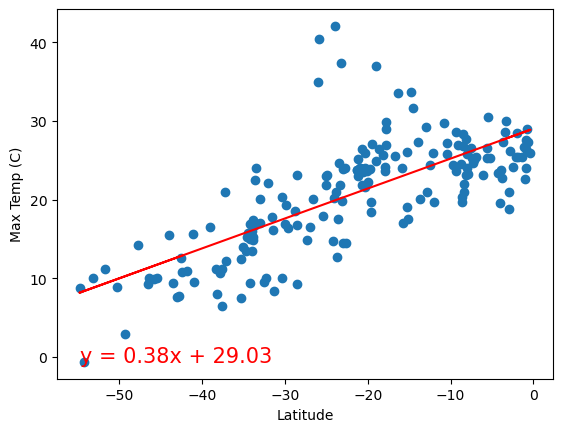

In [108]:
# Linear regression on Southern Hemisphere
SLat = southern_hemi_df["Lat"]
STemp = southern_hemi_df["Max Temp"]
lineregplot(SLat,STemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

**Discussion about the linear relationship: The trend in both graphs, for Northern and Southern Hemispheres, seem to be that as the location approach to equator the max temperature rises. Same goes for the converse, the max temperature falls the further you get away from the equator.

### Humidity vs. Latitude Linear Regression Plot

the r-value is : 0.1583320257226919


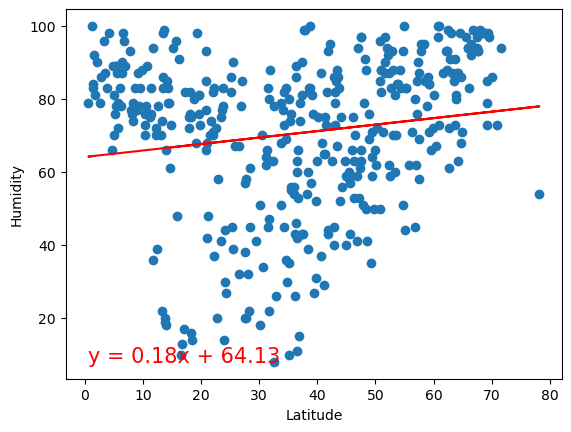

In [109]:
# Northern Hemisphere
NHum = northern_hemi_df["Humidity"]
lineregplot(NLat,NHum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

the r-value is : 0.09948037792965914


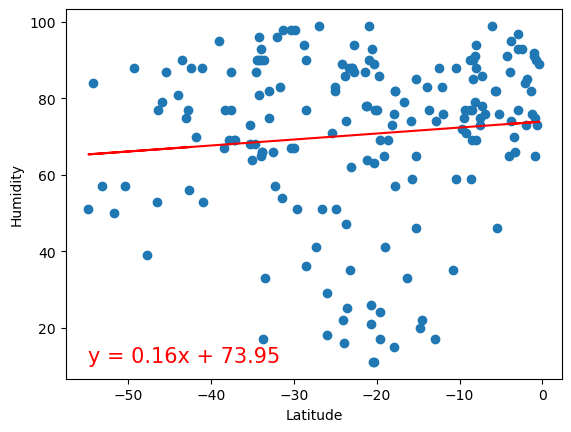

In [110]:
# Southern Hemisphere
SHum = southern_hemi_df["Humidity"]
lineregplot(SLat,SHum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship: There appears to be no strong coreelation between Humidity and Latitude, as the line of best fit doesn't truly fit the data, and the r-values of both are small.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is : 0.15528019675203927


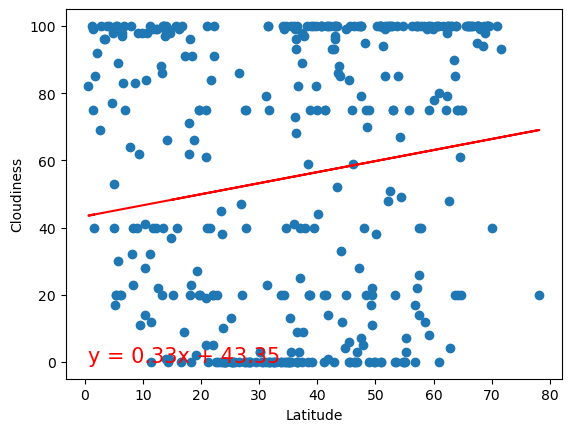

In [111]:
# Northern Hemisphere
NCloud = northern_hemi_df["Cloudiness"]
lineregplot(NLat,NCloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

the r-value is : 0.12454118616399723


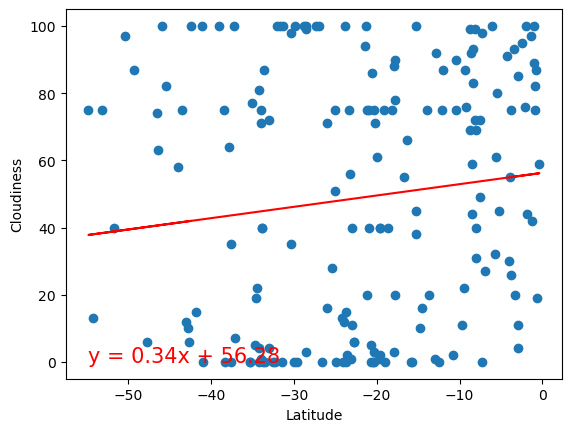

In [112]:
# Southern Hemisphere
SCloud = southern_hemi_df["Cloudiness"]
lineregplot(SLat,SCloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship: Just like with Humidity vs. Latitude, these graphs exhbit very similar talking points. There seems to be no strong correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is : 0.11772605514183197


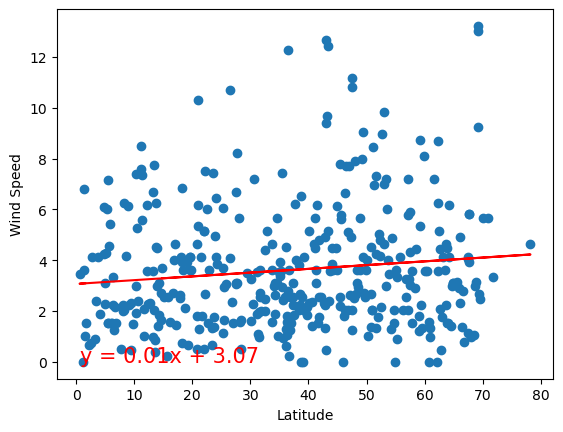

In [113]:
# Northern Hemisphere
NWind = northern_hemi_df["Wind Speed"]
lineregplot(NLat,NWind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

the r-value is : -0.24591560766583215


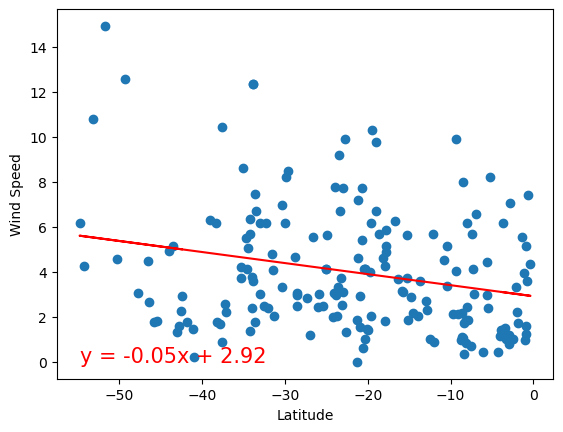

In [115]:
# Southern Hemisphere
SWind = southern_hemi_df["Wind Speed"]
lineregplot(SLat,SWind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship: While the r-values for the Wind Speed vs. Latitude are small and the correlation is not strong, there can be an arguement made that there may be some correaltion between higher wind speeds the further you move away from the equator. There a few select points around -50 Lat and 70 Lat the graphs, however further data sets would be needed to see if this was acutally a correlation or simply coincidence for one set of data.